# Data visualization for the BP addresses

See below for a Sankey chart showing the flow of transactions from the BP addresses.

In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import altair as alt

In [2]:
pd.set_option('display.max_rows', 50)

In [3]:
data_directory = '../jsonl/producerpay'
df = pd.DataFrame()
for data_file in [join(data_directory, f) for f in listdir(data_directory) if isfile(join(data_directory, f))]:
    df = pd.concat([df, pd.read_json(data_file, lines=True)])
df = df.sort_values('amount')

In [4]:
df

,account,date,timestamp,amount,token,from,to,block_num,transaction_id,memo,contract,action
59,eosio.bpay,2022-10-31 21:02:30,2022-10-31 21:02:30,86.1326,EOS,eosio.bpay,eosphereiobp,276146115,f8eff8dfd761844d0b2a0436276a8e3d7cde4ceb3c0acf...,producer block pay,eosio.token,transfer
32,eosio.vpay,2022-10-30 06:00:06,2022-10-30 06:00:06,119.5303,EOS,eosio.vpay,eosvenezuela,275865602,43d86f9a300f575471677d49c5cab8060896f1a0cfba35...,producer vote pay,eosio.token,transfer
22,eosio.vpay,2022-10-31 07:00:02,2022-10-31 07:00:02,122.0377,EOS,eosio.vpay,eosvenezuela,276045258,4f86cc274f5defdfb86439b1241a860e749bb1da85be86...,producer vote pay,eosio.token,transfer
34,eosio.vpay,2022-11-01 08:00:02,2022-11-01 08:00:02,122.3843,EOS,eosio.vpay,eosvenezuela,276224881,421726b767ce1aabcdf48d5cf68d2a67b26abb3a0b07c6...,producer vote pay,eosio.token,transfer
27,eosio.vpay,2022-10-29 05:00:02,2022-10-29 05:00:02,123.0817,EOS,eosio.vpay,eosvenezuela,275685676,c2b51e403504e278d5584e9d71bef620ab8e43db972f5b...,producer vote pay,eosio.token,transfer
...,...,...,...,...,...,...,...,...,...,...,...,...
1,eosio.vpay,2022-10-29 00:04:36,2022-10-29 00:04:36,712.7486,EOS,eosio.vpay,newdex.bp,275650228,e03fd7db2f2ce23e6130d0afc5c3ee4d31ea6ae7e8c4de...,producer vote pay,eosio.token,transfer
1,eosio.vpay,2022-11-01 00:05:18,2022-11-01 00:05:18,714.4640,EOS,eosio.vpay,newdex.bp,276168015,b9c981c0e545d2714d295960f95c064013ca55b849e833...,producer vote pay,eosio.token,transfer
1,eosio.vpay,2022-11-02 00:05:19,2022-11-02 00:05:19,715.0651,EOS,eosio.vpay,newdex.bp,276340556,e246b1d13038bbabb33ba09c1a211ebbcd2d85940d7c76...,producer vote pay,eosio.token,transfer
67,eosio.bpay,2022-10-29 17:36:27,2022-10-29 17:36:27,1263.4297,EOS,eosio.bpay,bitfinexeos1,275776405,2a59efa7810dd5326a712a4aa926ebe5a200018c0702ae...,producer block pay,eosio.token,transfer


In [5]:
from pysankey import sankey
import seaborn as sns

In [6]:
left_colors = {'eosio.bpay': '#3d3d3d', 'eosio.vpay': '#9a9a9a'}
right_colors = {}
palette = (c for c in sns.color_palette('husl', df['to'].nunique()))

for dest in df['to'].unique():
    right_colors[dest] = next(palette)

 The following arguments are deprecated and should be removed: figSize in sankey()


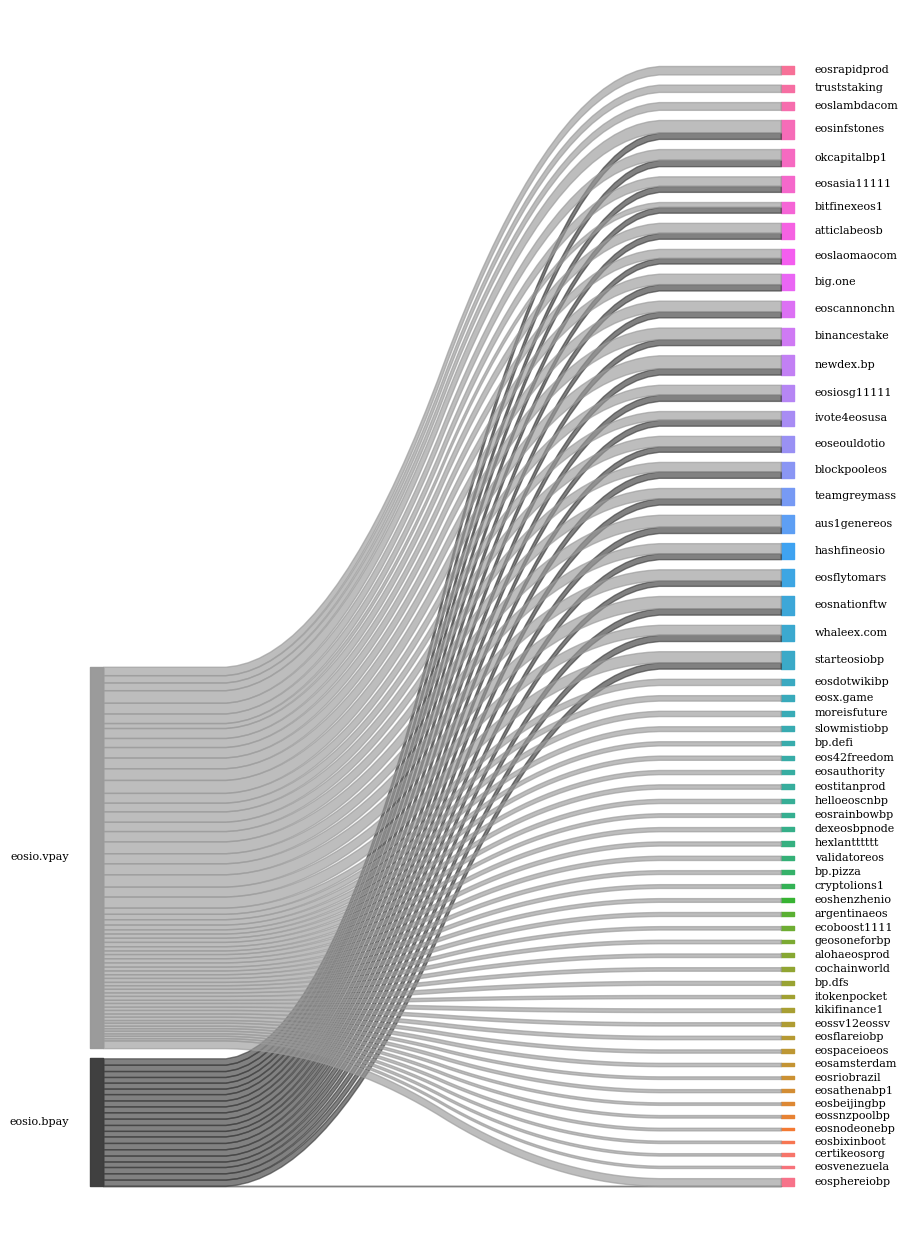

In [7]:
weight = df['amount'].astype(float)
ax = sankey(
    left=df['from'],
    right=df['to'],
    rightWeight=weight,
    leftWeight=weight,
    aspect=2,
    fontsize=8,
    figSize=(10, 16),
    colorDict=left_colors | right_colors
)